<a href="https://colab.research.google.com/github/hackathonjm/NeuroPredict/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
!pip install svc

In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Data Collection

In [ ]:
#importing the data
df=pd.read_csv('/content/data_csv.csv')


Data Analysis

In [ ]:
#printing first 5 data of the dataset
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [ ]:
print(df.columns)

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')


In [ ]:
columns_to_drop = ['CASE_NO_PATIENT\'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Childhood Autism Rating Scale', 'Ethnicity', 'Family_mem_with_ASD', 'Who_completed_the_test',]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,ASD_traits
0,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,F,Yes,No
1,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,M,Yes,Yes
2,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,M,Yes,Yes
3,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,Yes,M,No,Yes
4,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,Yes,F,No,Yes


In [ ]:
cat=list(df.select_dtypes(include=['object']))
cat

['Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Jaundice',
 'ASD_traits']

In [ ]:
l=LabelEncoder()
for i in cat:
  df[i]=l.fit_transform(df[i])

In [ ]:
df[cat].head()

,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,ASD_traits
0,1,1,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1


In [ ]:
df.isnull().sum()

,0
Social_Responsiveness_Scale,9
Age_Years,0
Qchat_10_Score,39
Speech Delay/Language Disorder,0
Learning disorder,0
Genetic_Disorders,0
Depression,0
Global developmental delay/intellectual disability,0
Social/Behavioural Issues,0
Anxiety_disorder,0


In [ ]:
df.dtypes

,0
Social_Responsiveness_Scale,float64
Age_Years,int64
Qchat_10_Score,float64
Speech Delay/Language Disorder,int64
Learning disorder,int64
Genetic_Disorders,int64
Depression,int64
Global developmental delay/intellectual disability,int64
Social/Behavioural Issues,int64
Anxiety_disorder,int64


In [ ]:
df['Qchat_10_Score'].fillna(df['Qchat_10_Score'].mean(), inplace=True)

In [ ]:
df['Social_Responsiveness_Scale'].fillna(df['Social_Responsiveness_Scale'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Social_Responsiveness_Scale,0
Age_Years,0
Qchat_10_Score,0
Speech Delay/Language Disorder,0
Learning disorder,0
Genetic_Disorders,0
Depression,0
Global developmental delay/intellectual disability,0
Social/Behavioural Issues,0
Anxiety_disorder,0


In [ ]:
df

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,ASD_traits
0,3.0,2,3.0,1,1,1,1,1,1,1,0,1,0
1,6.0,3,4.0,1,1,1,1,1,1,1,1,1,1
2,7.0,3,4.0,1,1,1,1,1,1,1,1,1,1
3,1.0,2,10.0,1,1,0,1,1,1,1,1,0,1
4,3.0,2,9.0,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1.0,7,6.0,0,0,0,0,0,0,0,1,0,0
1981,0.0,14,0.0,0,0,0,0,0,0,0,0,0,0
1982,1.0,7,6.0,0,0,0,0,0,0,0,1,0,1
1983,0.0,14,0.0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(df.columns)

Index(['Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Sex', 'Jaundice',
       'ASD_traits'],
      dtype='object')


In [ ]:
#number of rows and columns in the dataset
df.shape

(1985, 13)

In [ ]:
df['ASD_traits'].value_counts()

,count
ASD_traits,
1,1074
0,911


Yes - Have the ASD traits
No - Don't have the ASD traits

In [ ]:
#labelling the data
x = df.drop(columns = 'ASD_traits', axis=1)
y = df['ASD_traits']

In [ ]:
x

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice
0,3.0,2,3.0,1,1,1,1,1,1,1,0,1
1,6.0,3,4.0,1,1,1,1,1,1,1,1,1
2,7.0,3,4.0,1,1,1,1,1,1,1,1,1
3,1.0,2,10.0,1,1,0,1,1,1,1,1,0
4,3.0,2,9.0,1,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1.0,7,6.0,0,0,0,0,0,0,0,1,0
1981,0.0,14,0.0,0,0,0,0,0,0,0,0,0
1982,1.0,7,6.0,0,0,0,0,0,0,0,1,0
1983,0.0,14,0.0,0,0,0,0,0,0,0,1,0


In [ ]:
y

,ASD_traits
0,0
1,1
2,1
3,1
4,1
...,...
1980,0
1981,0
1982,1
1983,0


Train-Test Split

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, X_test.shape)

(1985, 12) (1588, 12) (397, 12)


Training the model

Using Logistic Regression

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_preds=model.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
LR=accuracy_score(y_test, y_preds)
LR

0.6876574307304786

Using Decision Tree

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preds2=model2.predict(X_test)
y_preds2

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
DT=accuracy_score(y_test,y_preds2)
DT

0.9345088161209067

In [ ]:
#accuracy score of the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy score of the data:', training_data_accuracy)

Accuracy score of the data: 0.7065491183879093


Using SVM

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#train using SVM
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_preds3=classifier.predict(X_test)
y_preds3

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
SVC=accuracy_score(y_test,y_preds3)
SVC

0.7178841309823678

In [ ]:
#accuracy score of the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy score of the data:', training_data_accuracy)

Accuracy score of the data: 0.7355163727959698


Using Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [ ]:
model3.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_preds4=model3.predict(X_test)
y_preds4

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
RF=accuracy_score(y_test,y_preds4)
RF

0.9319899244332494

Predicive System

In [ ]:
input_data = (0,4,0,0,0,0,0,0,1,0,1,1)
#changing to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [ ]:
#reshape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#standarise the input data
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshaped)
print(std_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
prediction = model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person does not have ASD traits')
else:
  print('The person have ASD traits')

[0]
The person does not have ASD traits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


comparing the accuracy

In [ ]:
#comparing all the model accuracy
scores = {
    'SVC': SVC,
    'Logistic Regression': LR,
    'Decision Tree': DT,
    'Random Forest': RF
}


In [ ]:
scores_df = pd.DataFrame(scores.items(), columns=['Model', 'Accuracy'])

In [ ]:
scores_df


,Model,Accuracy
0,SVC,0.717884
1,Logistic Regression,0.687657
2,Decision Tree,0.934509
3,Random Forest,0.931990


In [ ]:
import matplotlib.pyplot as plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

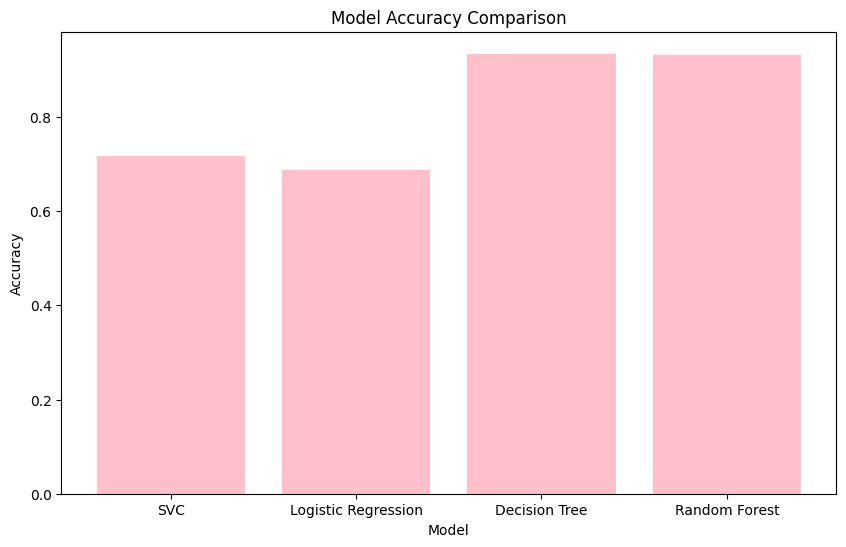

In [ ]:

#plot the scores
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['Accuracy'], color='Pink')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt

In [ ]:
import pickle as pkl

In [ ]:
with open('DecisionTreeclassifier.pkl', 'wb') as file:
    pkl.dump(model, file)